In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [66]:
female_data = pd.read_csv("ANSUR II FEMALE Public.csv")
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [67]:
male_data = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")
male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [68]:
data = pd.concat([female_data, male_data])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


In [69]:
# preprocessing
data["weightkg"] = data["weightkg"] / 10                # convert to kg
data["stature"] = data["stature"] / 10                  # convert to cm
data["Gender"] = data["Gender"].replace(["Female", "Male"], [0, 1])      # convert to binary

C:\Users\User\AppData\Local\Temp\ipykernel_17872\2071709363.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(["Female", "Male"], [0, 1])      # convert to binary


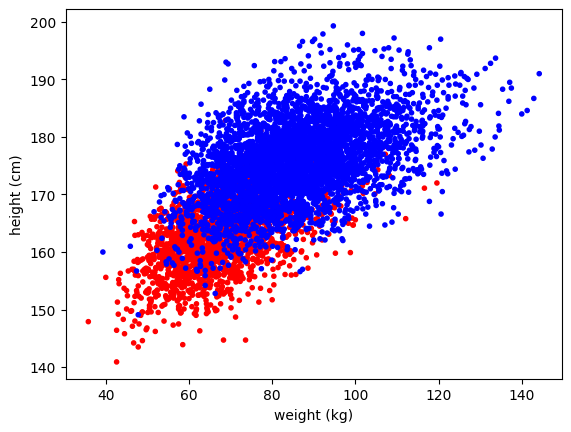

In [70]:
cmap = ["red", "blue"]
plt.scatter(data["weightkg"], data["stature"], c=data["Gender"], cmap=ListedColormap(cmap), marker=".")
plt.ylabel("height (cm)")
plt.xlabel("weight (kg)")
plt.show()

In [71]:
X = np.array([data["weightkg"], data["stature"]]).T
y = np.array(data["Gender"], dtype=int)
X

array([[ 65.7, 156. ],
       [ 53.4, 166.5],
       [ 66.3, 171.1],
       ...,
       [ 83.2, 169. ],
       [ 73.1, 171.8],
       [ 98.5, 182.8]])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [74]:
from knn import KNN

In [86]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

In [87]:
new_person = np.array([60, 150])
new_person_2 = np.array([120, 190])
new_person_3 = np.array([80, 180])

new_persons = [new_person, new_person_2, new_person_3]

outputs = knn.predict(new_persons)

In [88]:
for output in outputs:
    if output == 0:
        print('👩🏻')
    else:
        print('👨🏻')

👩🏻
👨🏻
👨🏻


In [89]:
knn.evaluate(X_test, y_test)
# k=3; accuracy=0.82
# k=5; accuracy=0.84
# k=7; accuracy=0.84

0.8179571663920923

In [79]:
y_pred = knn.predict(X_test)

In [80]:
confusion_matrix = np.zeros((2, 2))

for i in range (100):
    if y_test[i] == 0 and y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    elif y_test[i] == 1 and y_pred[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[25., 10.],
       [ 2., 63.]])

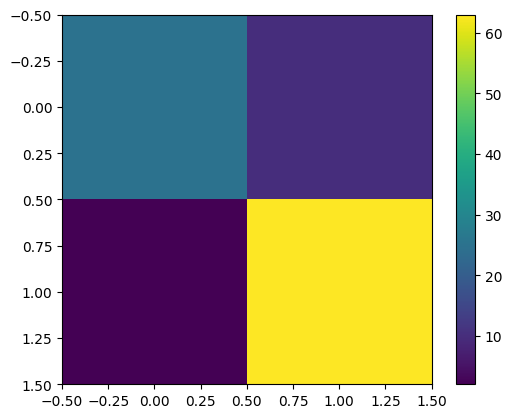

In [81]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.predict(new_persons)

array([0, 1, 1])

In [84]:
knn.score(X_test, y_test)

0.8261943986820428

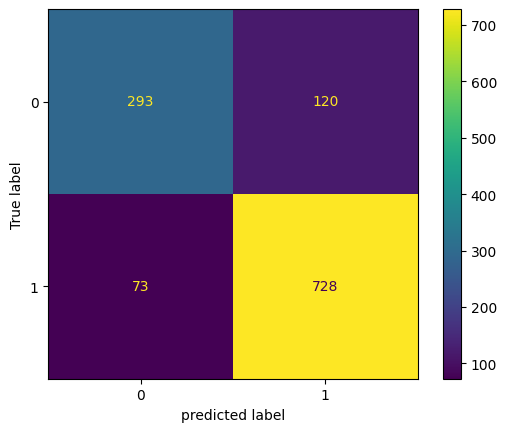

In [85]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()